<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Term Project</center></h2>
<p style="margin-top:0">Ezgi Tunalı - 2095693</ph3>

# Wine Clustering

###### loading libraries, inserting packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip3 install yellowbrick
#!pip3 install clusteval
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
import random
from sklearn.model_selection import train_test_split

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mp
import seaborn as sb
from sklearn import preprocessing
import numpy as np
from scipy import stats
import pandas as pd
from scipy.stats import spearmanr
from matplotlib import cm
from pandas.plotting import table
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn import metrics
import plotly
pd.options.display.float_format = '{:,.4f}'.format

## Data Preprocessing and Explanatory Data Analysis

In [4]:
wine_df = pd.read_csv('wine-clustering.csv', sep=",")
#wine_df.dtypes
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [5]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


In [6]:
wine_df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<AxesSubplot:>

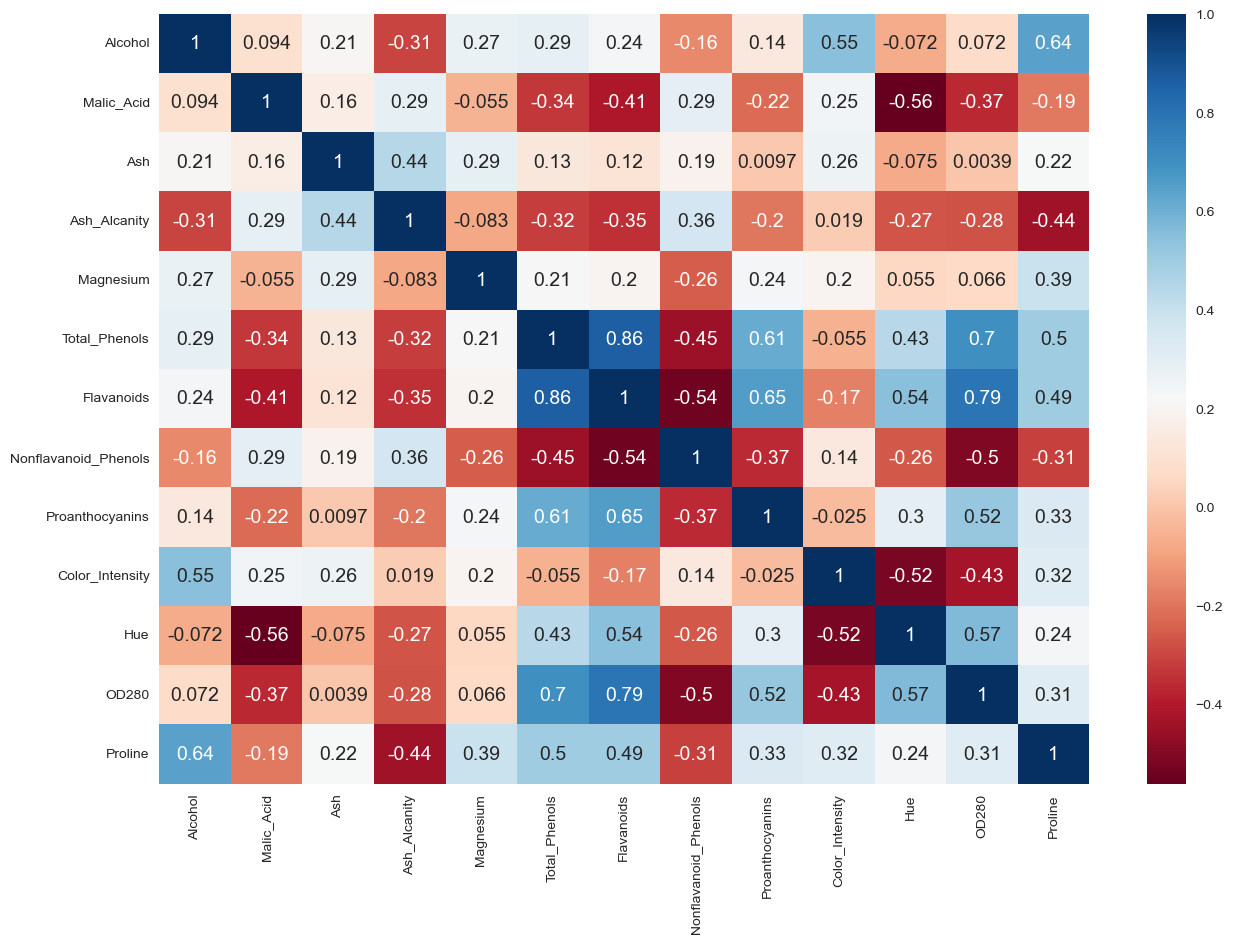

In [7]:
# Correlation Matrix

fig = plt.figure(figsize =(15, 10))
mp.rcParams.update({'font.size': 14})
corr_matrix = wine_df.corr() 
sb.heatmap(corr_matrix, cmap = cm.RdBu , annot=True)

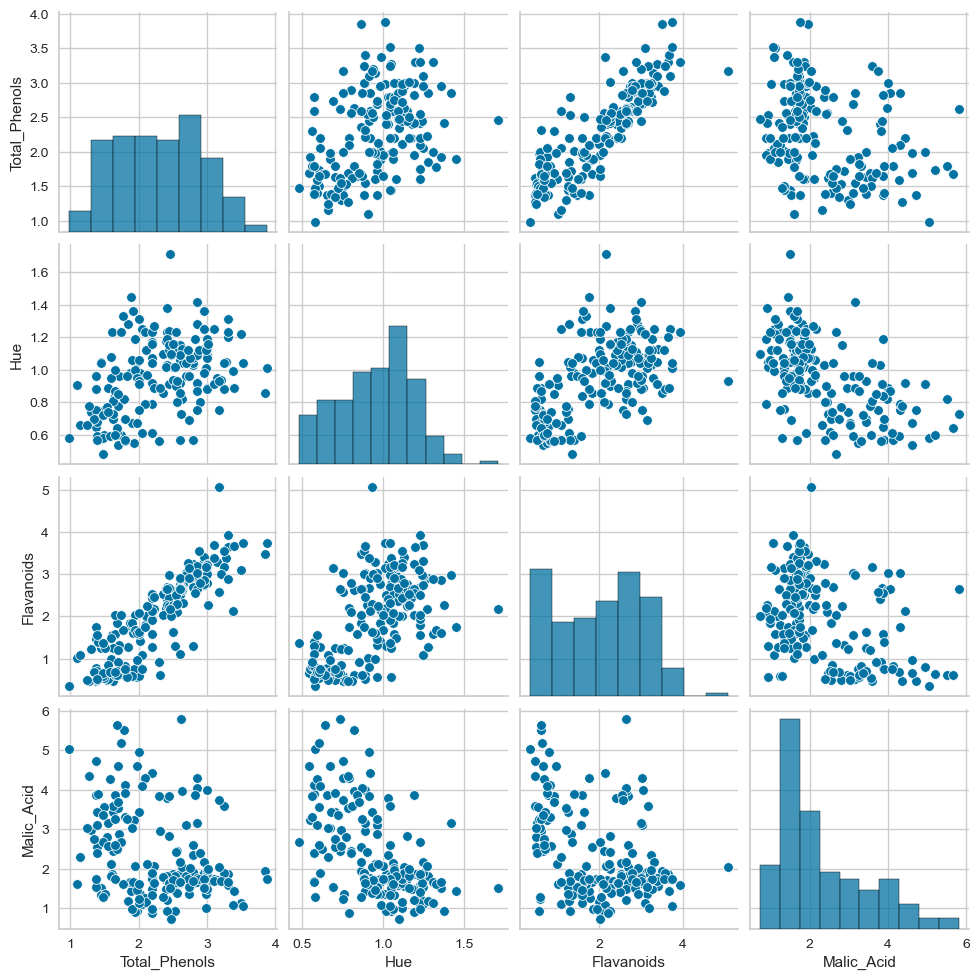

In [8]:
# Pairplots
sb.pairplot(wine_df[["Total_Phenols", "Hue",  "Flavanoids", "Malic_Acid"]])

## Research Questions

<h3 style="margin-top:0">Research Question 1:	How are phenolic profile and hue features correlated ? </h3>

In [9]:
phenols_hypo = wine_df[["Total_Phenols", "Hue"]] 

<b>Interquartile based outlier detection returns no outlier for both of the features. So this code snippet is designed as a markdown </b></br>

Q1p = np.percentile(wine_df["Total_Phenols"], 25, 
				interpolation = 'midpoint') </br>
Q1h = np.percentile(wine_df["Hue"], 25,
				interpolation = 'midpoint') </br>
Q3p = np.percentile(wine_df["Total_Phenols"], 75,
				interpolation = 'midpoint') </br>
Q3h = np.percentile(wine_df["Hue"], 75,
				interpolation = 'midpoint') </br></br>
IQRp = Q3p - Q1p </br>
IQRh = Q3h - Q1h </br>

upperscore_p = (Q3p+1.5*IQRp)</br>
lowerscore_p = (Q1p-1.5*IQRp)</br>
upperscore_h = (Q3h+1.5*IQRh)</br>
lowerscore_h = (Q1h-1.5*IQRh)</br>
</br>
phenols_hypo = phenols_hypo.drop(phenols_hypo[phenols_hypo["Total_Phenols"] > upperscore_p].index)</br>
phenols_hypo = phenols_hypo.drop(phenols_hypo[phenols_hypo["Total_Phenols"] < lowerscore_p].index)</br>
phenols_hypo = phenols_hypo.drop(phenols_hypo[phenols_hypo["Hue"] > upperscore_h].index)</br>
phenols_hypo = phenols_hypo.drop(phenols_hypo[phenols_hypo["Hue"] < lowerscore_h].index)</br>

In [10]:
#H₀: data is normally distributed
#H₁: data is not normally distributed

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    if p_value_normality <0.05:
        print("p value:", p_value_normality, "--> The data is not normally distributed")
    else:
        print("p value:", p_value_normality, "--> The data is normally distributed") 

In [11]:
for i in phenols_hypo.columns:
    print (i)
    check_normality(phenols_hypo[i])
    print("\n")

Total_Phenols
p value: 0.0043947165831923485 --> The data is not normally distributed


Hue
p value: 0.01742566004395485 --> The data is not normally distributed




In [12]:
print(spearmanr(phenols_hypo["Total_Phenols"], phenols_hypo["Hue"]))
print("correlation coefficient :%.12f" % spearmanr(phenols_hypo["Total_Phenols"], phenols_hypo["Hue"]).correlation)
print("p value: %.12f" % spearmanr(phenols_hypo["Total_Phenols"], phenols_hypo["Hue"]).pvalue)

SpearmanrResult(correlation=0.4394574760931776, pvalue=8.414731017650825e-10)
correlation coefficient :0.439457476093
p value: 0.000000000841


<h3 style="margin-top:0">Research Question 2: How does higher flavanoids content affect malic acid amount ?  </h3>

Q1f = np.percentile(wine_df["Flavanoids"], 25, 
				interpolation = 'midpoint') </br>
Q1m = np.percentile(wine_df["Malic_Acid"], 25,
				interpolation = 'midpoint') </br>
Q3f = np.percentile(wine_df["Flavanoids"], 75,
				interpolation = 'midpoint') </br>
Q3m = np.percentile(wine_df["Malic_Acid"], 75,
				interpolation = 'midpoint') </br>
IQRf = Q3f - Q1f </br>
IQRm = Q3m - Q1m </br>
upperscore_f = (Q3f+1.5*IQRf)</br>
lowerscore_f = (Q1f-1.5*IQRf)</br>
upperscore_m = (Q3m+1.5*IQRm)</br>
lowerscore_m = (Q1m-1.5*IQRm)</br>

flavs_df = wine_df</br>
flavs_df = flavs_df.drop(flavs_df[phenols_hypo["Total_Phenols"] > upperscore_f].index)</br>
flavs_df = flavs_df.drop(flavs_df[phenols_hypo["Total_Phenols"] < lowerscore_f].index)</br>
flavs_df = flavs_df.drop(flavs_df[phenols_hypo["Hue"] > upperscore_m].index)</br>
flavs_df = flavs_df.drop(flavs_df[phenols_hypo["Hue"] < lowerscore_m].index)</br>
flavs_df.shape - (178,13)

In [13]:
#grouping based on flavanoids mean
wine_df.loc[wine_df["Flavanoids"] <= wine_df["Flavanoids"].mean() , 'FlavanoidBin'] = 0
wine_df.loc[wine_df["Flavanoids"] > wine_df["Flavanoids"].mean() , 'FlavanoidBin'] = 1

low_flav = wine_df[["Malic_Acid", "Flavanoids", "FlavanoidBin"]].loc[wine_df["FlavanoidBin"] == 0]
high_flav = wine_df[["Malic_Acid", "Flavanoids", "FlavanoidBin"]].loc[wine_df["FlavanoidBin"] == 1]

check_normality(high_flav["Malic_Acid"])
check_normality(low_flav["Malic_Acid"])

p value: 1.382787495618487e-10 --> The data is not normally distributed
p value: 0.003956276457756758 --> The data is not normally distributed


In [14]:
#H₀: there is no statistically significant difference between means distributions
#H₁: there is statistically significant difference between means distributions

ttest,pvalue = stats.mannwhitneyu(high_flav["Malic_Acid"], low_flav["Malic_Acid"], alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0026
Reject null hypothesis


In [15]:
#H₀: The mean distribution of malic_acid amount of high_flavonoids group is not statistically significantly greater than that of low_flavanoids 
#H₁: The mean distribution of malic_acid amount of high_flavonoids group is statistically significantly greater than that of low_flavanoids

#both have same distribution - right skewed. they are not normally distributed
#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(high_flav["Malic_Acid"], low_flav["Malic_Acid"], alternative="greater")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.9987
Fail to reject null hypothesis


In [16]:
#H₀: The mean distribution of malic_acid amount of high_flavonoids group is statistically significantly greater than that of low_flavanoids
#H₁: The mean distribution of malic_acid amount of high_flavonoids group is not statistically significantly greater than that of low_flavanoids 

ttest,pvalue = stats.mannwhitneyu(high_flav["Malic_Acid"], low_flav["Malic_Acid"], alternative="less")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.0013
Reject null hypothesis


## Feature Selection, Extraction

In [17]:
#df_no_malic_acid = wine_df.drop(["Malic_Acid", "FlavanoidBin"], axis = 1) #original w malicacid
#df_no_flavanoid = wine_df.drop(["Malic_Acid", "Flavanoids"], axis = 1) #bin wo malicacid
wine_df = wine_df.drop(["FlavanoidBin"], axis = 1) #original

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
#no_malic_acid = scaler.fit_transform(df_no_malic_acid)
#noflavanoid = scaler.fit_transform(df_no_flavanoid)
wine = scaler.fit_transform(wine_df)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.8421,0.1917,0.5722,0.2577,0.6196,0.6276,0.5738,0.2830,0.5931,0.3720,0.4553,0.9707,0.5613
1,0.5711,0.2055,0.4171,0.0309,0.3261,0.5759,0.5105,0.2453,0.2744,0.2645,0.4634,0.7802,0.5506
2,0.5605,0.3202,0.7005,0.4124,0.3370,0.6276,0.6118,0.3208,0.7571,0.3754,0.4472,0.6960,0.6469
3,0.8789,0.2391,0.6096,0.3196,0.4674,0.9897,0.6646,0.2075,0.5584,0.5563,0.3089,0.7985,0.8573
4,0.5816,0.3656,0.8075,0.5361,0.5217,0.6276,0.4958,0.4906,0.4448,0.2594,0.4553,0.6081,0.3260


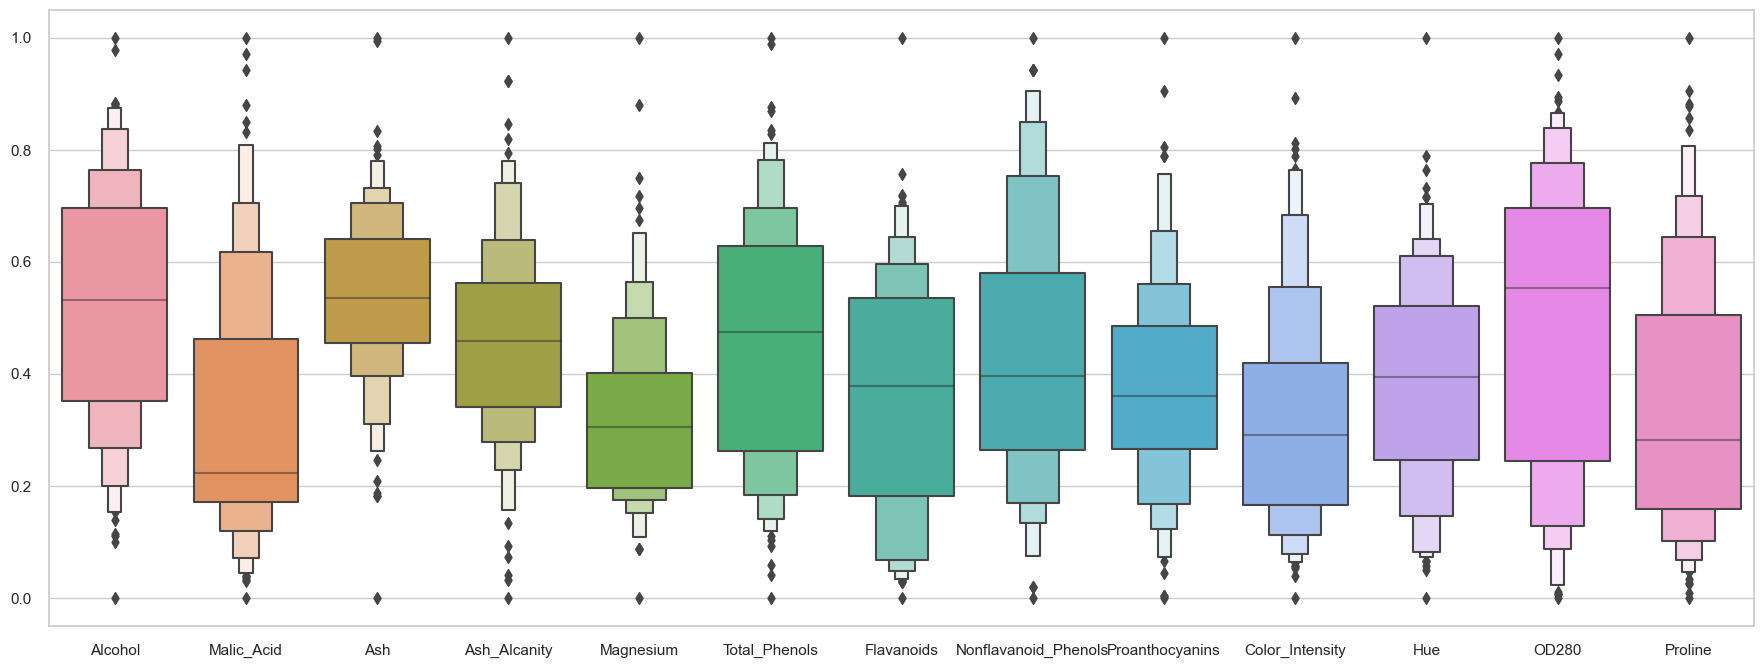

In [21]:
wine = pd.DataFrame(wine)
wine.columns = wine_df.columns
sb.set(rc={'figure.figsize':(22,8)}, font_scale=1.0, style='whitegrid')
sb.boxenplot(data=wine)

wine.head()

### PCA

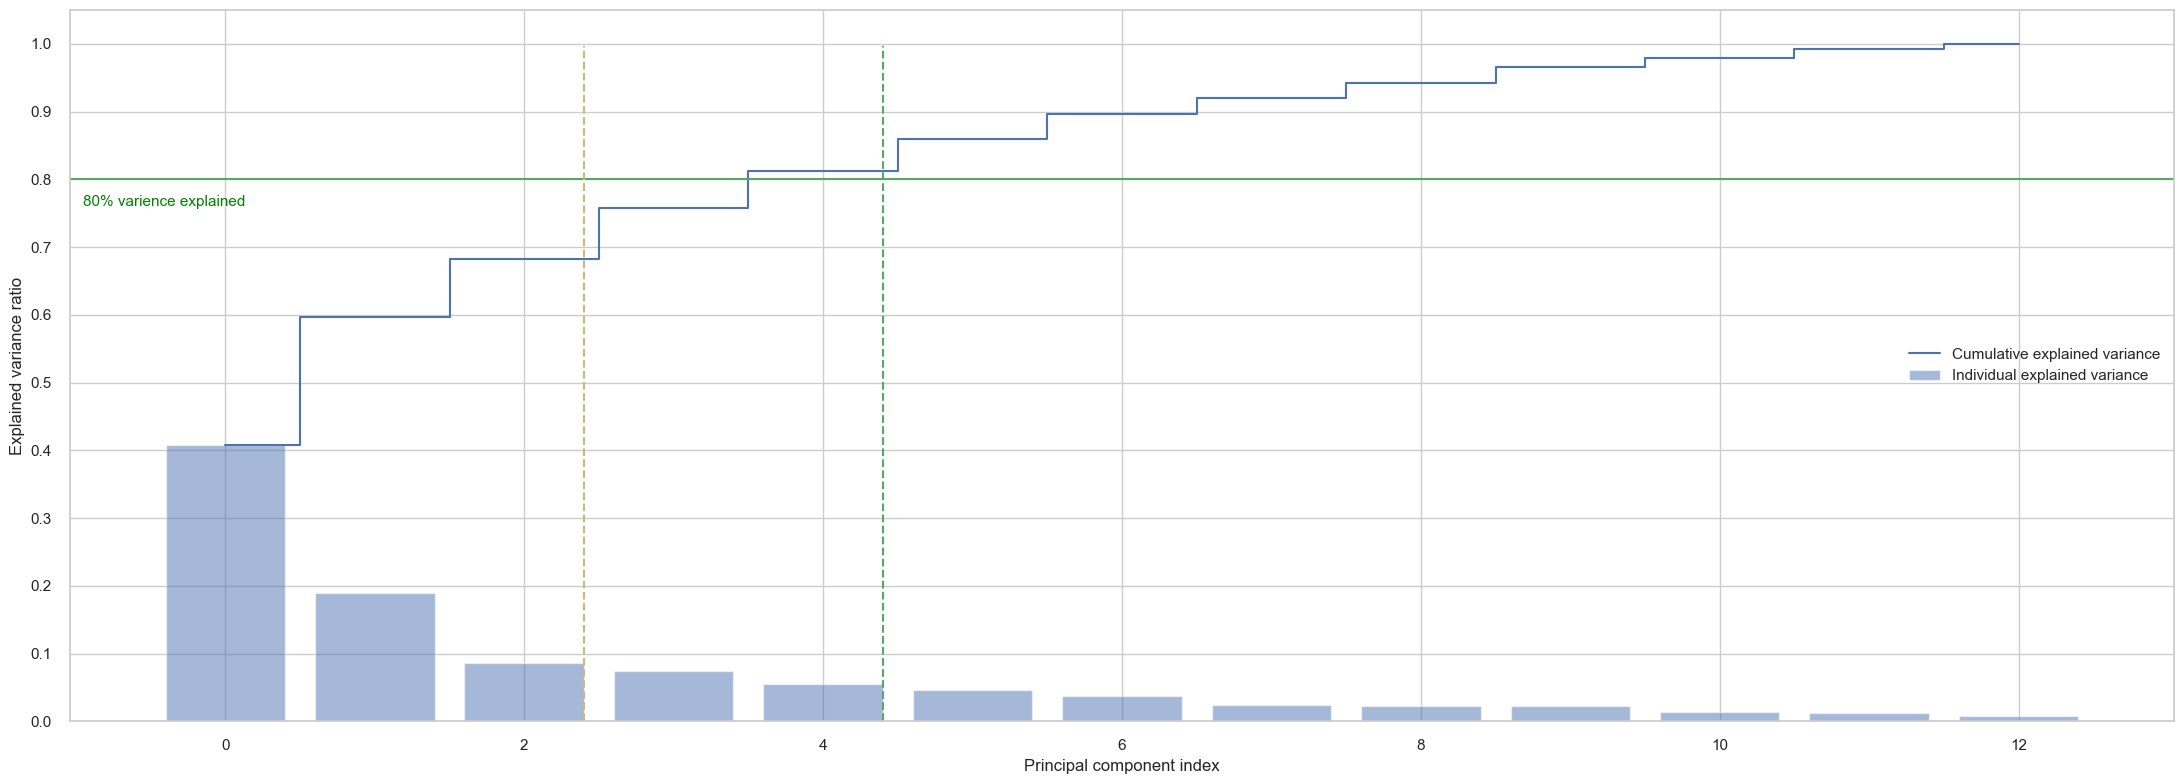

In [22]:
pca = PCA()
pca.fit(wine)

exp_var_pca = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(exp_var_pca)), cumulative_explained_variance, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(y=0.80, color='g', linestyle='-')
plt.axvline(x=4.4, ymax = 0.95, color='g', linestyle='--')
plt.axvline(x=2.4, ymax = 0.95, color='y', linestyle='--')
plt.text(-0.95, 0.76, '80% varience explained', color = 'green', fontsize=11)
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

In [34]:
#Scree criterion
wine_pca_3 = PCA(n_components=2)
wine_pca_3 = wine_pca_3.fit_transform(wine)
wine_pca_3 = pd.DataFrame(data = wine_pca_3, columns = ['principal component 1', 'principal component 2'])
wine_pca_3.head()

,principal component 1,principal component 2
0,-0.7063,-0.2532
1,-0.4850,-0.0088
2,-0.5212,-0.1892
3,-0.8216,-0.5809
4,-0.2025,-0.0595


In [35]:
#80% varience threshold
wine_pca_5 = PCA(n_components=5)
wine_pca_5 = wine_pca_5.fit_transform(wine)
wine_pca_5 = pd.DataFrame(data = wine_pca_5, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5'])
wine_pca_5.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.7063,-0.2532,0.0241,0.0133,-0.0266
1,-0.4850,-0.0088,-0.2805,0.0759,-0.2386
2,-0.5212,-0.1892,0.1962,-0.0158,0.0450
3,-0.8216,-0.5809,0.0811,0.0122,-0.0048
4,-0.2025,-0.0595,0.3002,-0.1021,0.1058


## Machine Learning Models & Model Tuning 

### K-MEANS 

#### Baseline Model

In [36]:
baseline_model = KMeans (n_clusters= 3, random_state=10) #same clustering every time. 
baseline_model.fit(wine)
baseline_labels = baseline_model.predict(wine)
sil_score = metrics.silhouette_score(wine, baseline_labels)
print(sil_score)
#print tendency
#print(labels counts 

0.2993667406489507


In [37]:
#Grid Search Tuning of Parameters

def grid_search_kmeans(dataset):

    grid_c = range(1,15,2) #odd numbers of clusters to have a tiebreaker
    grid_init = ['k-means++', 'random']

    grid_inertias = []
    grid_silhouette_scores = []
    grid_davies_bouldin = []
    n_clusters = []
    inits = []

    for k in grid_c:
        for i in grid_init:
        # KMeans instance with k clusters
            model = KMeans(n_clusters = k, init = i)
            model.fit(dataset)
            label = model.predict(dataset)
            grid_inertias.append(model.inertia_)
            counts = np.bincount(label[label>=0])
            if k != 1:
                silhouette_avg = silhouette_score(dataset,label)
                grid_silhouette_scores.append(silhouette_avg)
                db = davies_bouldin_score(dataset, label)
                grid_davies_bouldin.append(db)
            #if k ==1:
            #    grid_silhouette_scores.append('NaN')
            #    grid_davies_bouldin.append('NaN')
                n_clusters.append(k)    
                inits.append(i)
        
    grid_silhouette_scores = pd.DataFrame([grid_silhouette_scores])
    grid_inertias = pd.DataFrame([grid_inertias])
    grid_davies_bouldin = pd.DataFrame([grid_davies_bouldin])
    inits = pd.DataFrame([inits])
    n_clusters = pd.DataFrame([n_clusters])

    grid_metrics = pd.concat([n_clusters, inits, grid_silhouette_scores, grid_inertias, grid_davies_bouldin])
    grid_metrics = grid_metrics.transpose()

    headers =  ["Clusters", "Init", "Silhouette_Scores", "Inertias", "Davies_Bouldin"]
    grid_metrics.columns = headers
    
    
    return grid_metrics


#coloumns ekle
#

def elbow_plot (nc, inertias):
    # Plot number of clusters vs inertias
    plt.plot(nc, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.axvline(x=3, ymax = 0.95, color='r', linestyle='--')
    plt.ylabel('inertia')
    plt.xticks(nc)
    plt.title('Elbow Plot - Inertia')
    


In [38]:
def sil_vis(dataset):

    nc = range(1, 15,2)
    #nc = range(1,8) #2,3,4,5,6,7
    inertias = []
    fig1, ax = plt.subplots(3,2, figsize=(16, 20))
    silhouette_scores = []

    for k in nc:
        # KMeans instance with k clusters
        model = KMeans(n_clusters = k, random_state = 10) #default init random - ends up with higher silhouette scores
        model.fit(dataset)
        label = model.predict(dataset)
        inertias.append(model.inertia_)
        counts = np.bincount(label[label>=0])
        if k != 1:
            silhouette_avg = silhouette_score(dataset,label)
            silhouette_scores.append(silhouette_avg)
        #k=3 [0,0]; k=5 [0,1], k=7 [1,0], k=9 [1,1], k=11 [2,0], k=13 [2,1]
            q, mod = divmod(k+1, 4)
            q1, mod2 = divmod((mod) ,2)
            #k=2 [0,0], k=5 [0,1], k=7 [1,0], k=9 [1,1], k=11 [2,0], k=13 [2,1]
            #q, mod = divmod(k,2)
            visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-1][q1])
            #visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-1][mod])
            visualizer.fit(dataset)
            
    fig2, ax2 = plt.subplots(1) # Another figure
    elbow_plot(nc,inertias)
    
    fig1.show() 
    fig2.show() 
    


#### Original Dataset

In [39]:
wine_metrics = grid_search_kmeans(wine)
wine_metrics

,Clusters,Init,Silhouette_Scores,Inertias,Davies_Bouldin
0,3,k-means++,0.3013,95.5995,1.3053
1,3,random,0.3009,95.5995,1.3086
2,5,k-means++,0.2079,48.9540,1.9709
3,5,random,0.2256,48.9605,1.8046
4,7,k-means++,0.1315,42.4212,1.9818
5,7,random,0.2010,42.3646,1.6971
6,9,k-means++,0.1387,38.3405,1.8172
7,9,random,0.1352,37.9863,1.8139
8,11,k-means++,0.1441,34.5240,1.7240
9,11,random,0.1370,34.6287,1.7082


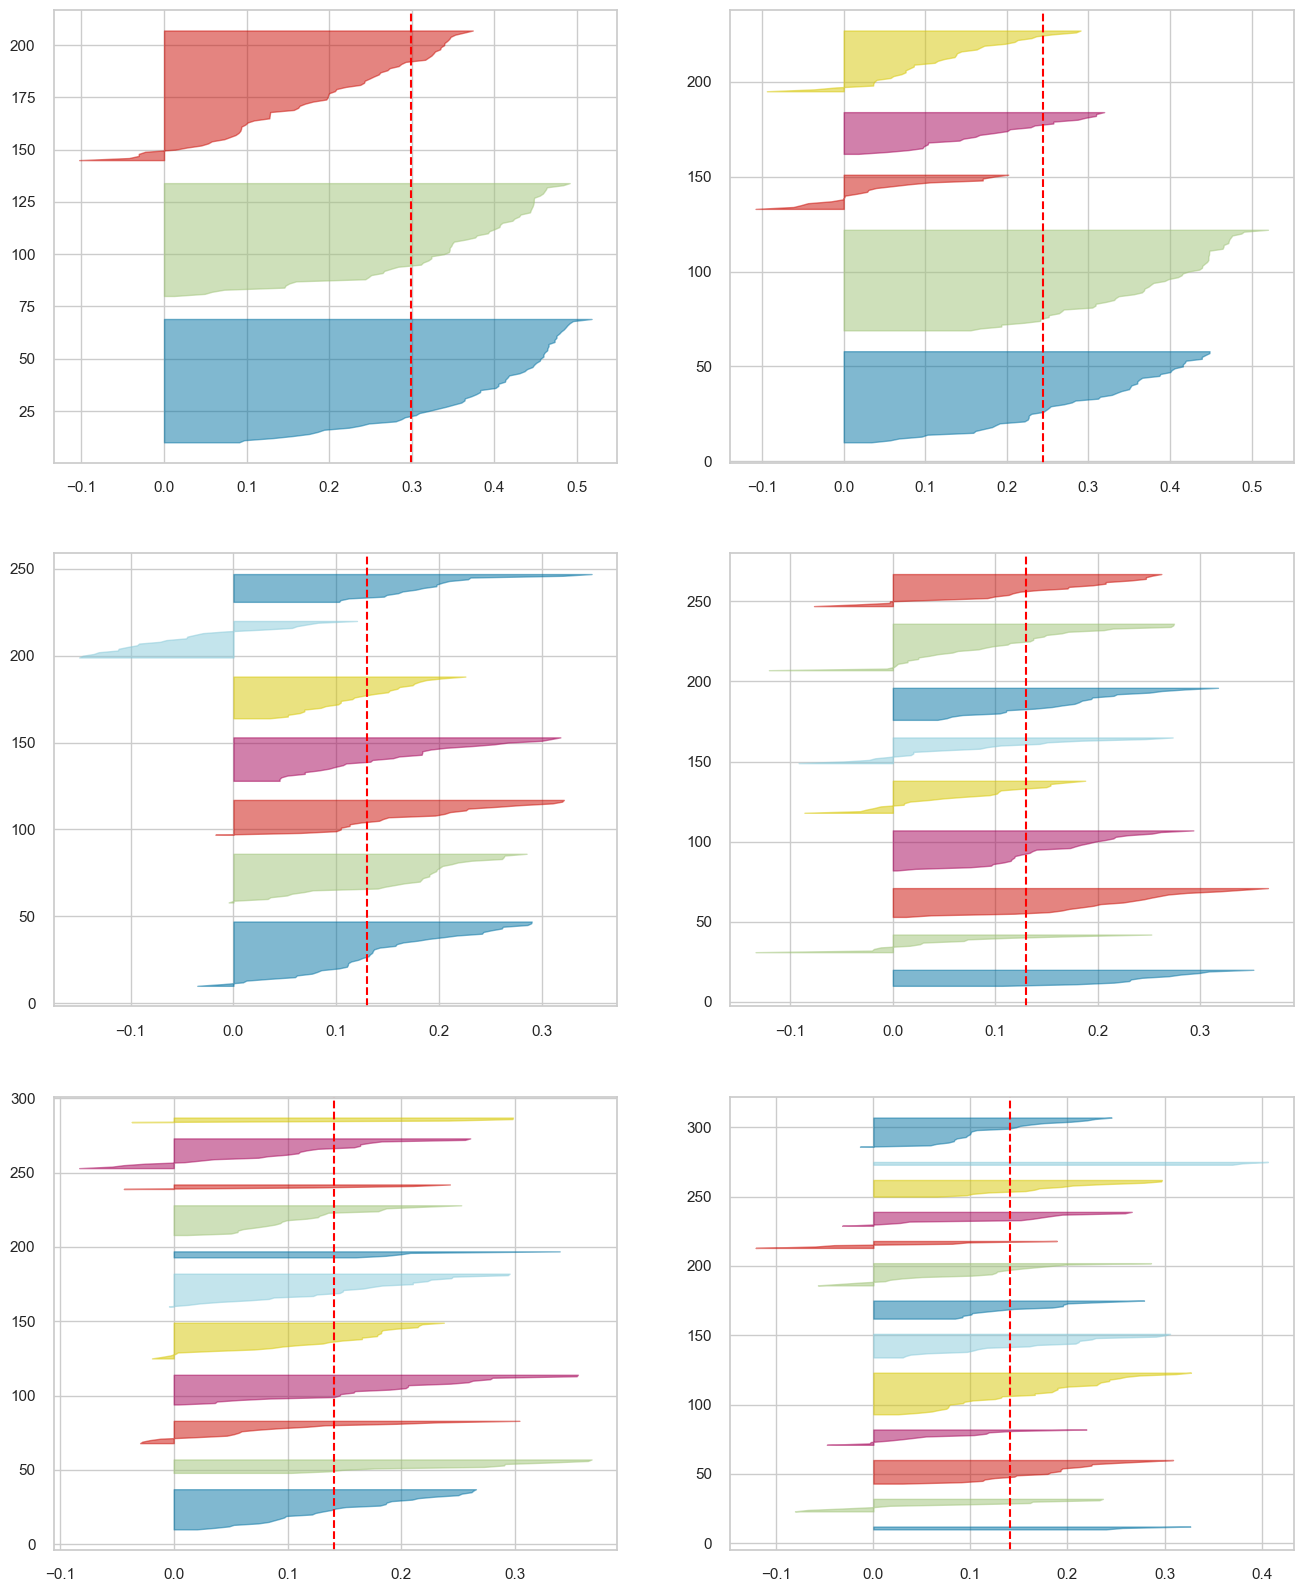

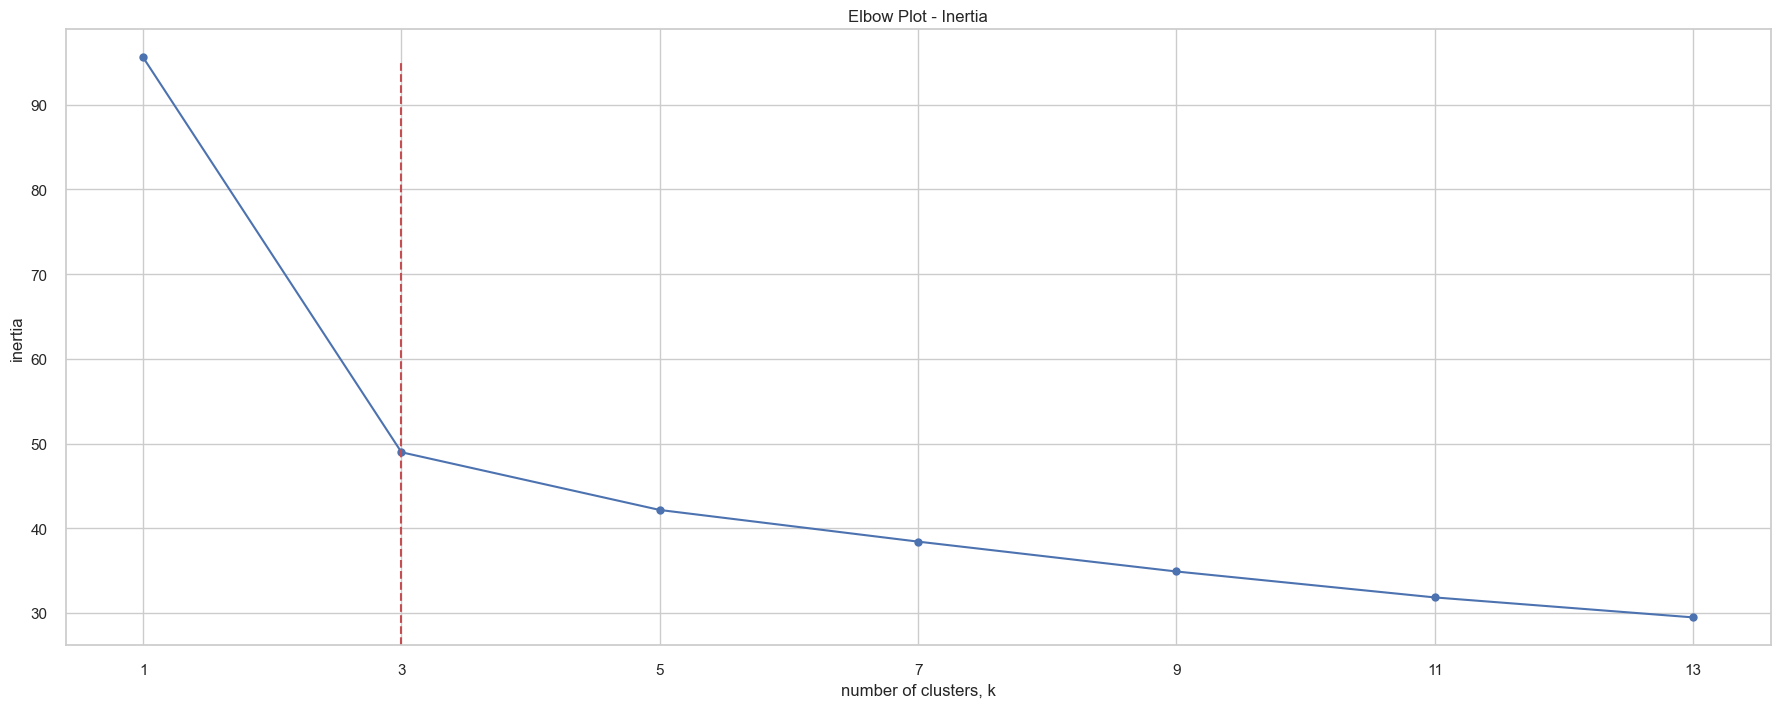

In [40]:
#silhouette plots and inertia plot for different k values
sil_vis(wine)

#### PCA_3 Dataset

In [41]:
wine_pca3_metrics = grid_search_kmeans(wine_pca_3)
wine_pca3_metrics 

,Clusters,Init,Silhouette_Scores,Inertias,Davies_Bouldin
0,3,k-means++,0.5681,57.0919,0.5848
1,3,random,0.5681,57.0919,0.5848
2,5,k-means++,0.4591,10.7718,0.7436
3,5,random,0.4591,10.7718,0.7436
4,7,k-means++,0.3995,6.3337,0.8193
5,7,random,0.3918,6.3337,0.8330
6,9,k-means++,0.3864,4.4561,0.8601
7,9,random,0.3847,4.4522,0.8531
8,11,k-means++,0.4041,3.5421,0.7873
9,11,random,0.4025,3.5691,0.8072


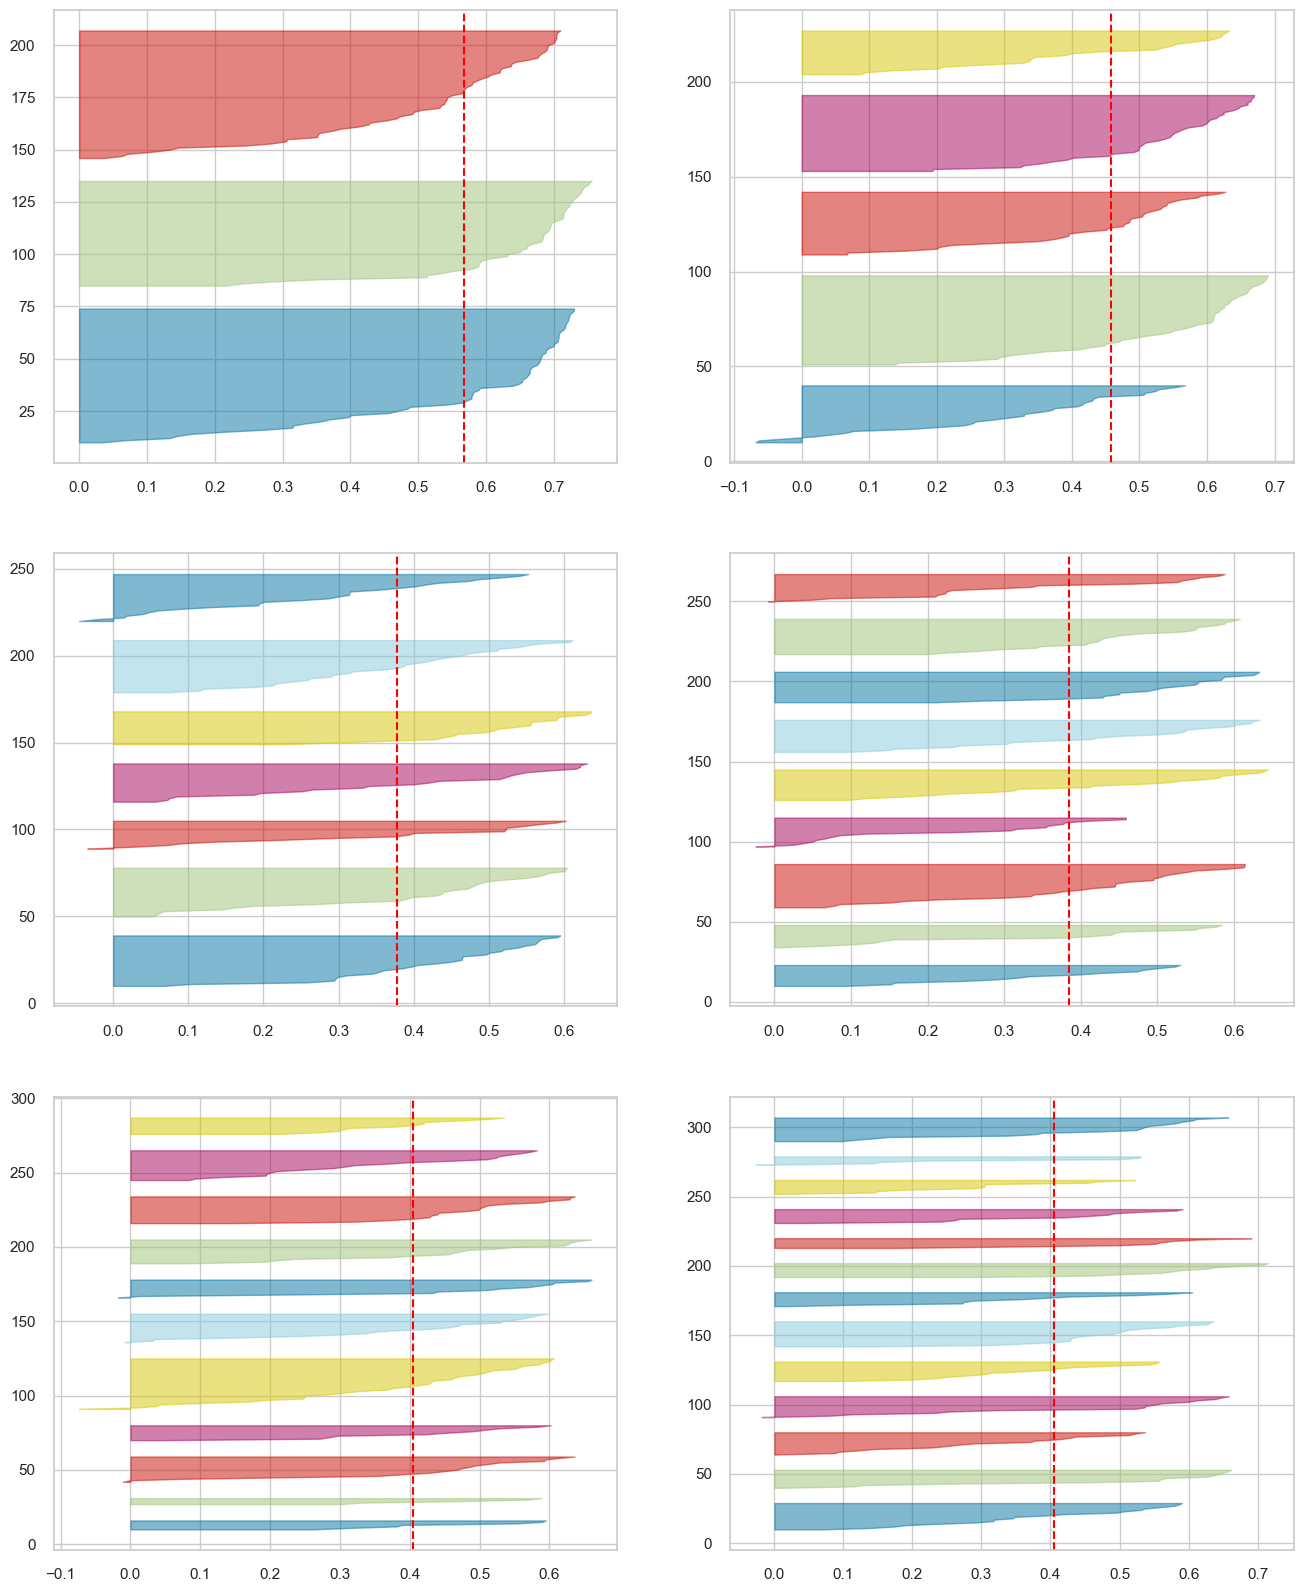

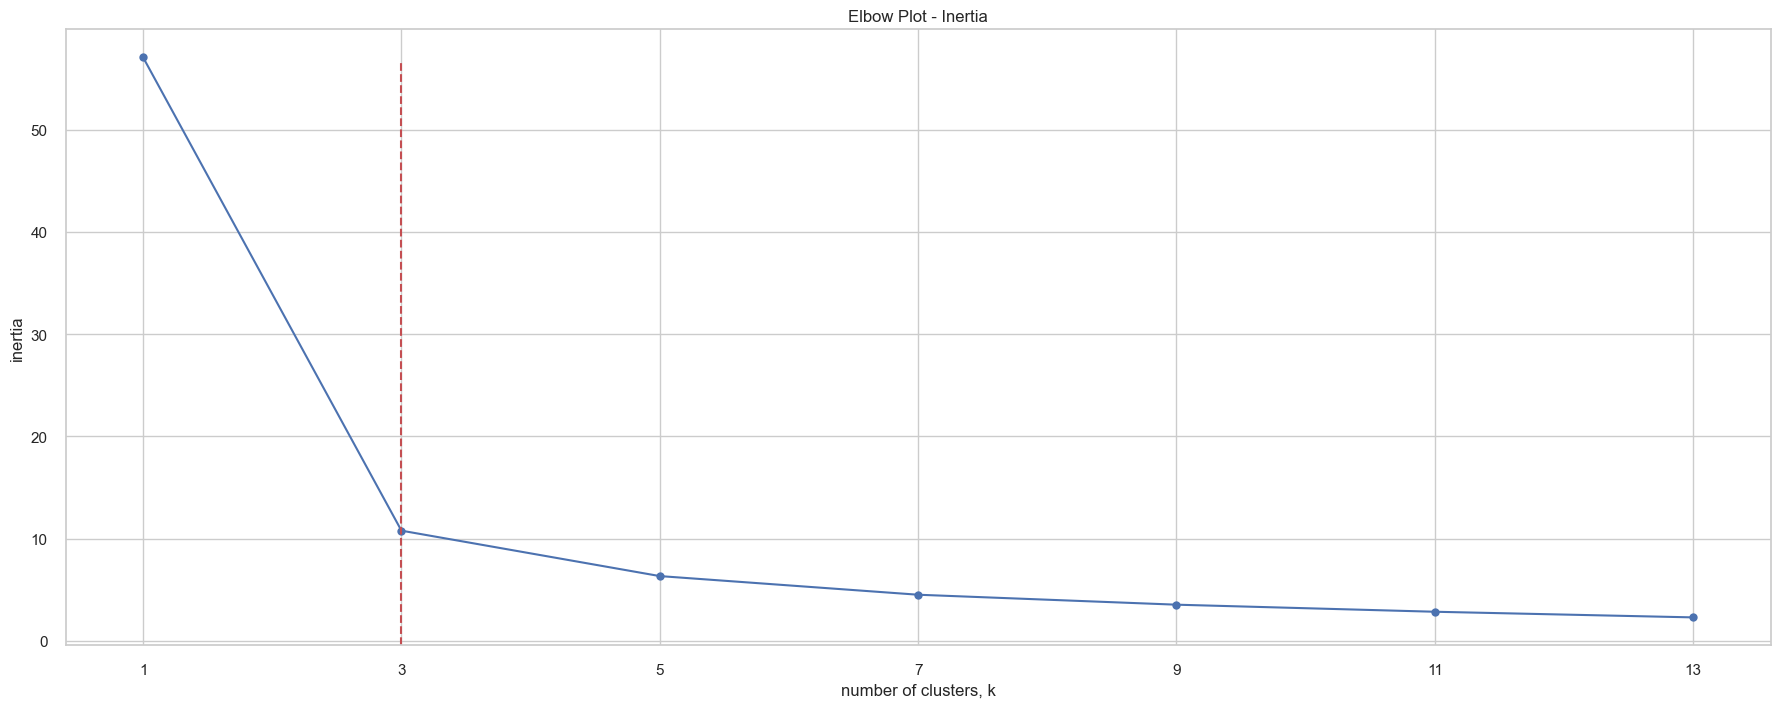

In [42]:
sil_vis(wine_pca_3)

#### PCA_5 Dataset

In [32]:
wine_pca5_metrics = grid_search_kmeans(wine_pca_5)
wine_pca5_metrics 

,Clusters,Init,Silhouette_Scores,Inertias,Davies_Bouldin
0,3,k-means++,0.3850,77.6971,1.0226
1,3,random,0.3847,77.6971,1.0246
2,5,k-means++,0.3325,31.2349,1.2187
3,5,random,0.3303,31.2363,1.2126
4,7,k-means++,0.2723,24.5505,1.3623
5,7,random,0.2300,24.5436,1.4075
6,9,k-means++,0.2063,21.0541,1.4066
7,9,random,0.2147,20.7059,1.3417
8,11,k-means++,0.2057,18.3633,1.3260
9,11,random,0.2023,18.2762,1.3070


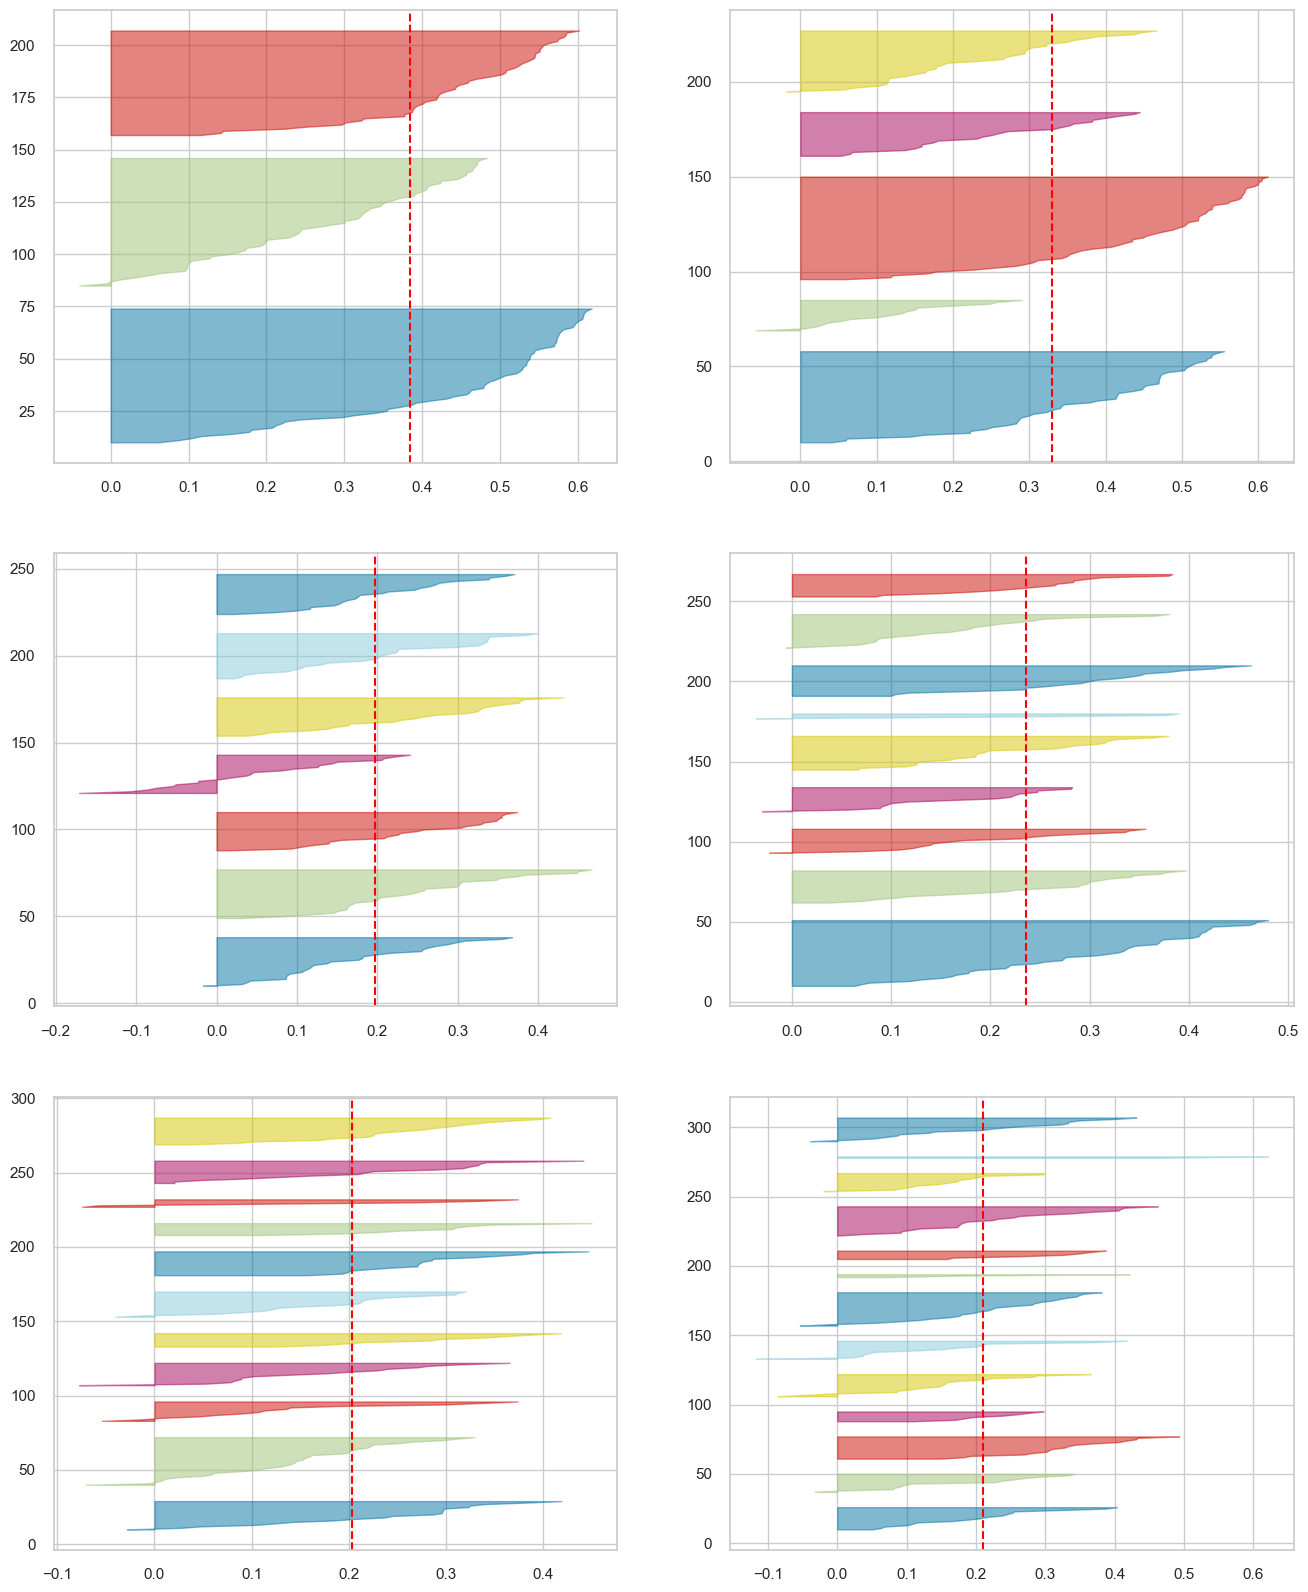

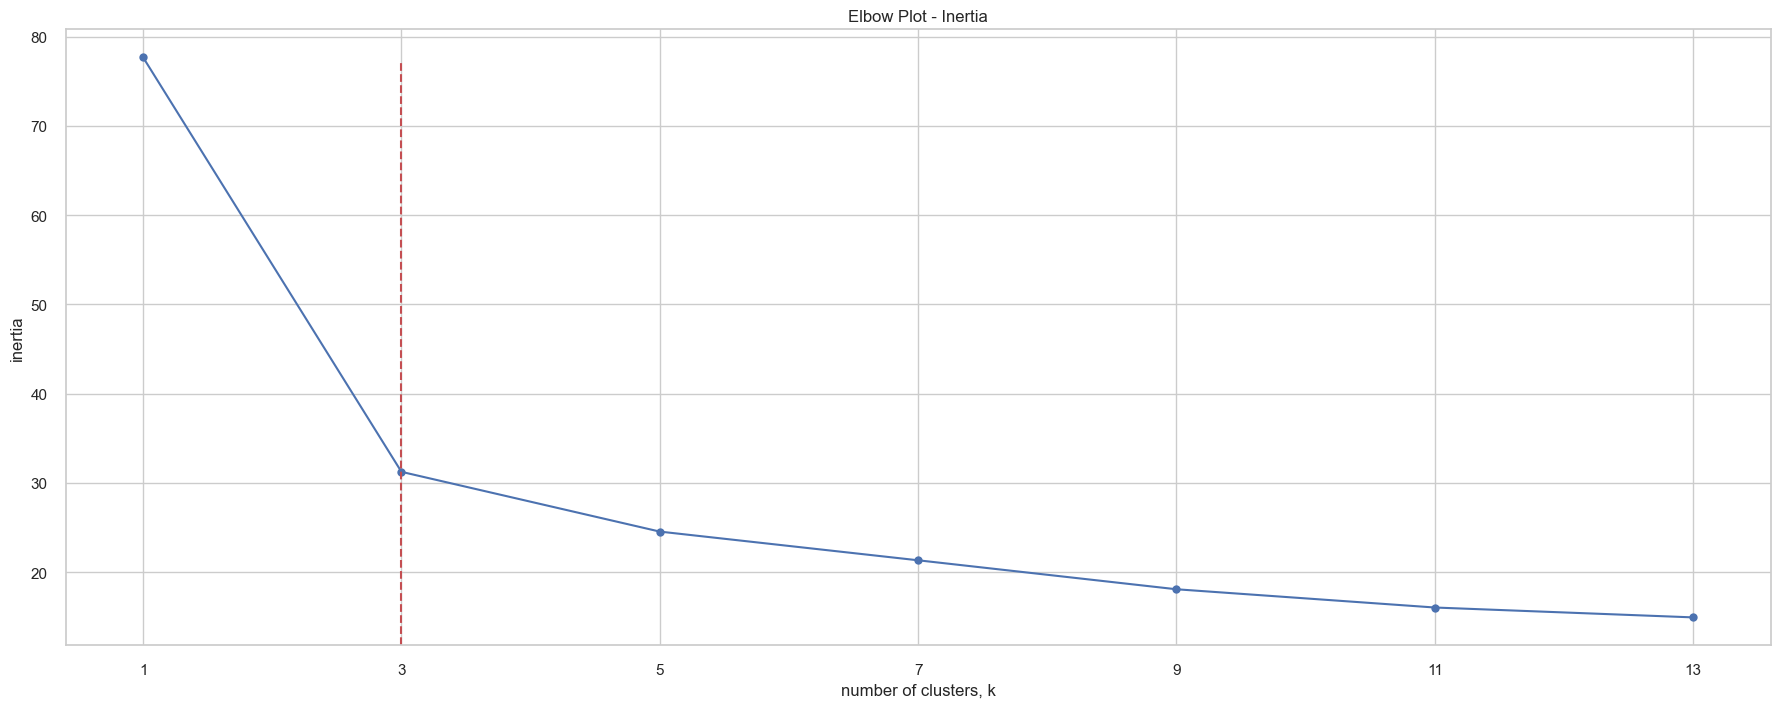

In [33]:
sil_vis(wine_pca_5)

# DBSCAN

#### Original Dataset

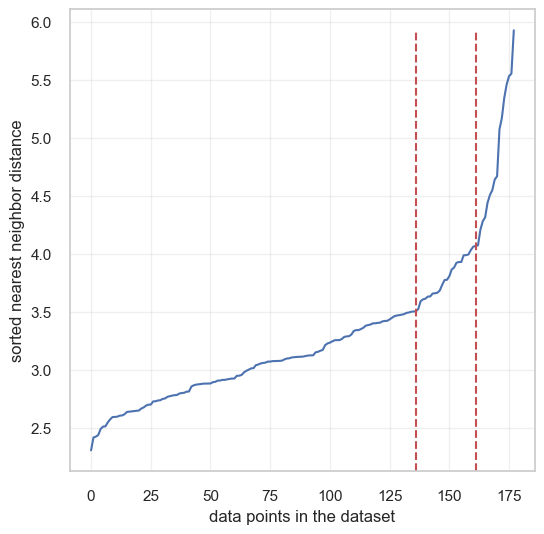

In [95]:
from sklearn.neighbors import NearestNeighbors
#### Original Dataset
k = 2* wine.shape[-1]
near_neg = NearestNeighbors(n_neighbors=k).fit(wine)

# For each point, compute distances to its k-nearest neighbors
distances, indices = near_neg.kneighbors(wine)                                        
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

plt.figure(figsize=(6,6))
plt.plot(distances)
plt.xlabel('data points in the dataset')
plt.ylabel('sorted nearest neighbor distance')
plt.axvline(x=136, ymax=0.95,  color='r', linestyle='--')
plt.axvline(x=161, ymax=0.95,  color='r', linestyle='--')
plt.grid(True, linestyle="-", alpha=0.3)
plt.show()

#3.6 and 4.1 seems appropriate

In [96]:
from sklearn.cluster import DBSCAN
max_ss = 0 
best_eps = 0 
best_min_samp = 0 
all_ss = []

print('eps, min_samp, n_clusters,silhouette_score \n')

for e in [3.5, 4.1]: #3.4,3.5,3.6,3.7,3.8,
    for ms in [10,12,15,20,22,24,26]: #
        
        dbs = DBSCAN(eps=e, min_samples=ms, n_jobs=-1).fit(wine)
        #Calculating predicted labels and number of clusters
        pred_labels = dbs.labels_
        n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
        ss = silhouette_score(wine, pred_labels)
        all_ss.append(ss)
        if ss >= max_ss:
            max_ss = ss
            best_eps = e
            best_min_samp = ms  
            print(best_eps, '  ', best_min_samp, '         ',  n_clusters, '       ', np.round(ss,4))
            #-1 labels represent outliers


eps, min_samp, n_clusters,silhouette_score 

3.5    10           1         0.2462
4.1    10           1         0.2559
4.1    12           1         0.2559
4.1    15           1         0.2559
4.1    20           1         0.2582
4.1    22           1         0.2582
4.1    24           1         0.2582
4.1    26           1         0.2582


In [97]:
dbs = DBSCAN(eps=4.1, min_samples=20, n_jobs=-1).fit(wine)
#Calculating predicted labels and number of clusters
pred_labels = dbs.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
ss = silhouette_score(wine, pred_labels)

print('Silhouette_score is: ', ss, ', number of clusters is:', n_clusters) #no distinction at all, no grouping, no outlier detection nothing.

Silhouette_score is:  0.2582359497429061 , number of clusters is: 1


## Model Comparison

### Kmeans with original dataset

In [100]:
model1 = KMeans(n_clusters=3, random_state = 10)
model1.fit(wine)
model1_all_labels = model1.predict(wine)
wine['model1_labels'] = model1_all_labels
kf = KFold(n_splits =10,  shuffle = True, random_state = 10)

wine_x = wine.iloc[:, :-1].values
wine_y = wine["model1_labels"].values
#wine.head()

In [101]:
#computing each points square distance to its cluster with cross validation

kf = KFold(n_splits=10)
i = 0
x_dist = []
labels = []

for train_index, test_index in kf.split(wine_x, wine_y):
    training_data = wine_x[train_index]
    training_label = wine_y[train_index]
    validation_data = wine_x[test_index]
    validation_label = wine_y[test_index]

    model1.fit(training_data,training_label)
    model1.predict(validation_data)
    #SSE.append(model1.inertia_)
    xdist = model1.transform(validation_data)**2 #Compute clustering and transform data to cluster-distance space.
    xdist = xdist.min(axis=1) #
    #xdist = np.argmin(xdist)
    x_dist.append(np.round(xdist.sum(),4))
    labels.append(model1.labels_)

In [102]:
print(x_dist, "\n")

[113.6626, 106.0269, 103.9367, 207.8002, 147.3967, 142.4334, 213.5181, 151.7041, 159.1693, 84.3926] 



### Kmeans with pca dataset

In [103]:
model2 = KMeans(n_clusters=3, random_state = 10)
model2.fit(wine_pca_3)
model2_all_labels = model2.predict(wine_pca_3)
wine_pca_3['model2_labels'] = model2_all_labels

wine_x_pca3 = wine_pca_3.iloc[:, :-1].values
wine_y_pca3 = wine_pca_3["model2_labels"].values
#wine_pca_3.head()

In [104]:
kf = KFold(n_splits=10)
i = 0
x_dist_pca = []
labels_pca = []

for train_index, test_index in kf.split(wine_x_pca3, wine_y_pca3):
    training_data = wine_x_pca3[train_index]
    training_label = wine_y_pca3[train_index]
    validation_data = wine_x_pca3[test_index]
    validation_label = wine_y_pca3[test_index]

    model2.fit(training_data,training_label)
    model2.predict(validation_data)
    xdist_pca = model2.transform(validation_data)**2 #Compute clustering and transform data to cluster-distance space.
    xdist_pca = xdist_pca.min(axis=1) #
    #xdist = np.argmin(xdist)
    x_dist_pca.append(np.round(xdist_pca.sum(),4))
    labels_pca.append(model2.labels_)
#https://stackoverflow.com/questions/72126226/model-fit-in-a-for-loop-for-k-fold-cross-validation    

In [105]:
print(x_dist_pca, "\n")

[59.3734, 54.7147, 37.747, 92.5728, 60.9884, 48.7738, 89.3492, 62.184, 43.2024, 38.5576] 



### Statistical Test for Comparison 
#### nonparametric pair test on cross validation squared sum distances

In [106]:
#Mann-Whitney U Test

#H₀: The mean distribution of x_dist_pca is not statistically significantly greater than that of x_dist 
#H₁: The mean distribution of x_dist_pca is statistically significantly greater than that of x_dist

#unpaired datasets, similar distribution 

ttest,pvalue = stats.mannwhitneyu(x_dist, x_dist_pca, alternative="greater")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    

p-value:0.00016492
Reject null hypothesis


#### nonparametric pair test on silhouette scores for same parameters

In [111]:
#a = wine_metrics["Silhouette_Scores"].loc[wine_metrics["Silhouette_Scores"] != 'NaN']
a = wine_metrics["Silhouette_Scores"].dropna() 
b = wine_pca3_metrics["Silhouette_Scores"].dropna() 
c = wine_metrics["Davies_Bouldin"].dropna() 
d = wine_pca3_metrics["Davies_Bouldin"].dropna() 

silhouette_wine = list(a)
silhouette_pca = list(b)
Davies_wine = list(c)
Davies_pca = list(d)

In [116]:
ttest,pvalue = stats.mannwhitneyu(silhouette_pca, silhouette_wine, alternative="greater")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    

p-value:0.00004850
Reject null hypothesis


#### nonparametric pair test on silhouette scores for same parameters

In [115]:
ttest,pvalue = stats.mannwhitneyu(Davies_wine, Davies_pca, alternative="greater")

print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    

p-value:0.00001822
Reject null hypothesis
